In [1]:
import numpy as np 
import plotly.graph_objects as go
from gpcam import GPOptimizer

# Plotting the results on a 3D plot
def plot(x, y, z,data = None):
    fig = go.Figure()
    fig.add_trace(go.Surface(x = x, y = y, z=z))
    if data is not None:
        fig.add_trace(go.Scatter3d(x=data[:,0], y=data[:,1], z=data[:,2],
                                   mode='markers',marker=dict(size=12,
                                                              color=data[:,2],         # Set color equal to a variable
                                                              #colorscale='Viridis',   # Choose a colorscale
                                                              opacity=0.8)
                                   )
        )

    fig.update_layout(title='Plot', autosize=True,
                  width=800, height=800,
                  margin=dict(l=65, r=50, b=65, t=90),scene=dict(xaxis_title='Temperature', yaxis_title='Cycle', zaxis_title='Energy'))


    fig.show()

$$
\text{energy} = -c^2 - 4c(\max(T) - T) + 600 000
$$

In [ ]:
# Define the temperature range and the step size
temp = np.arange(0, 100, 1)

# Define the cycle range and the step size
cycle = np.arange(0, 600, 1)

# Create a mesh grid of the temperature and cycle values
T, C = np.meshgrid(temp, cycle)

# Define the energy as a function of temperature and cycle

energy = -C**2 - 4*C*(np.max(T) -T) + 600000

#Plot the results
plot(T,C,energy)

In [3]:
# Creating arrays of data with temperatures 10, 50, and 80 and cycles 1 to 600
# Create the initial 2D array with 10 in the first column and values from 1 to 100 in the second column
array_10 = np.column_stack((np.full((100,), 10), np.arange(1, 601,6)))
array_50 = np.column_stack((np.full((100,), 50), np.arange(1, 601,6)))
array_80 = np.column_stack((np.full((100,), 80), np.arange(1, 601,6)))

# Stack the arrays vertically to create the final array
x_data = np.vstack((array_10, array_50, array_80))


print(x_data.shape)

temp = x_data[:,0]
cyc = x_data[:,1]

y_data = -cyc**2 - 4*cyc*(np.max(temp) -temp) + 600000

# Add normally distributed random errors to the second column
error = np.random.normal(loc=100000, scale=10000, size=(300,)) # size=y_data.shape  maybe better
y_data = y_data + error

print(y_data.shape)

(300, 2)
(300,)


In [43]:
# Define the grid size
n = 100

# Design Space Limits
c_low = 0
c_high = 600
temp_low = 1
temp_high = 100

# Create a design space
y_space = np.linspace(c_low, c_high, n)
x_space = np.linspace(temp_low, temp_high, n)
x_space, y_space = np.meshgrid(x_space, y_space)

# Reshape the arrays into a 2-column array with 10000 rows
my_space = np.vstack((x_space.reshape(-1), y_space.reshape(-1))).T

In [57]:
def get_distance_matrix(x1,x2):
    d = np.zeros((len(x1),len(x2)))
    for i in range(x1.shape[1]):
        d += (x1[:,i].reshape(-1, 1) - x2[:,i])**2
    return np.sqrt(d + 1e-16)

def s(x, hps):
    slope = hps[2]
    offset = hps[3]
    o = slope * x[:,0] + offset
    return np.diag(o)

# def my_kernel(x1,x2,hps,obj):
#     d = get_distance_matrix(x1,x2)
#     k = hps[0] * obj.squared_exponential_kernel(d,hps[1])
#     return k 


# Mean Function
def mean(x, hps):
    y = -(x[:,1]/hps[4])**2 - hps[5]*x[:,1]*(hps[6] - x[:,0]) # + hps[6]
    return y

# 

In [79]:
# my_gpo = GPOptimizer(2, np.array([[temp_low,temp_high],[c_low,c_high]]))
# my_gpo = GPOptimizer(x_data, y_data)
# my_gpo.init_gp(np.array([0.01, 0.01, 0.01, 1, 1, 80, 400000]), gp_mean_function=mean)

#my_gpo.init_gp(np.array([1.50218860e+01, 2.50038865e+02, 5.08911155e-02, 4.88959850e-01,
#        5.52568959e+01]), gp_kernel_function=kernel, gp_mean_function=mean)

#print("tell")
# my_gpo.tell(x_data,y_data,variances=0.001*y_data)

bounds = np.array([[0.001,100],[0.001,100],[0.001,100],[0.1,10],[0.1,10],[30,150],[300000,700000]])
my_trained_hps = np.array([0.01, 0.01, 0.01, 1, 1, 80, 400000])

my_gpo = GPOptimizer(x_data, y_data,
                      init_hyperparameters=my_trained_hps,
                      # hyperparameter_bounds=bounds,
                      # gp_kernel_function= my_kernel,
                      gp_mean_function=mean,
                      gp_noise_function=s)




my_gpo.train(hyperparameter_bounds=bounds)

#print("hps: ", my_gpo.hyperparameters)
f = my_gpo.posterior_mean(my_space)["f(x)"]
v = my_gpo.posterior_covariance(my_space, add_noise=True)["v(x)"]


f_re = f.reshape(100,100)

plot(x_space,y_space,f_re, data = np.column_stack([my_gpo.x_data,my_gpo.y_data]))


$$
\text{C-rate} = a \times \sin(\omega t + b) + 4
$$
where $a = 2$

In [ ]:
plot(x_space,y_space,f_re, data = np.column_stack([my_gpo.x_data,my_gpo.y_data]))


In [47]:
# The documentation says GPOptimizer takes x_data and y_data hence how could this be a 3d GP if it only takes 2 data inputs fo training not 3
# fvgp.GP also doesn't seem like it can take 2d data.
# Which class should I use for this ? Is there even a class built for this purpose ?

$$
\text{Mysine}(t) = \alpha \times \sin (\omega t + b) + ( \alpha + c )
$$

In [62]:
def my_sine_wave(x, alpha, omega, b, a):
    return alpha * np.sin(omega * x + b) + a


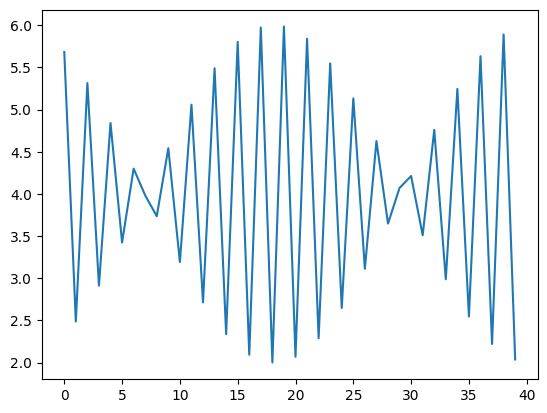

In [78]:
import matplotlib.pyplot as plt

x = np.arange(0,40,1)
y  = my_sine_wave(x, alpha=2, omega=3, b=1, a=4)
y1 = my_sine_wave(x, alpha=2, omega=2, b=1, a=2)
y2 = my_sine_wave(x, alpha=2, omega=1, b=1, a=2)

plt.plot(x,y)
# plt.plot(x,y1)
# plt.plot(x,y2)

plt.show()

In [ ]:
import plotly.graph_objects as go